In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

In [4]:
month = np.arange(12)
month

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Text(0, 0.5, 'Min and max temperature')

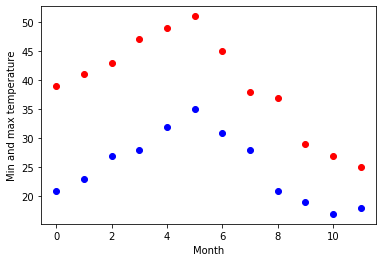

In [13]:
plt.plot(month, Max, 'ro')
plt.plot(month, Min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [14]:
#Fitting it to a periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      Min, [-40, 20, 0])

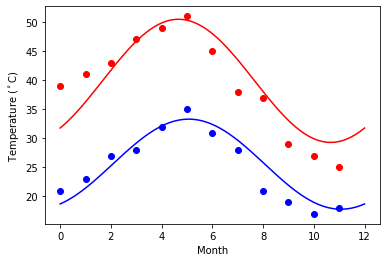

In [15]:
#Plotting the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(month, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [16]:
#Matplotlib
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [18]:
titanic.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [39]:
#Create a pie chart presenting the male/female proportion
t1 = titanic['sex'].value_counts(normalize=True) * 100
t1

male      64.400306
female    35.599694
Name: sex, dtype: float64

([<matplotlib.patches.Wedge at 0x2a891302a48>,
 [Text(0.7902135269676477, -0.7652206098879921, 'Male'),
  Text(-0.7902135986127683, 0.7652205359028591, 'Female')],
 [Text(0.43102556016417143, -0.4173930599389048, '64.400%'),
  Text(-0.4310255992433281, 0.41739301958337766, '35.600%')])

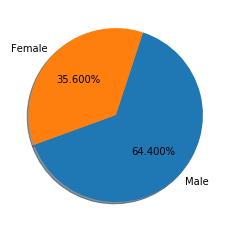

In [49]:
labels = 'Male','Female'
plt.pie(t1,autopct='%3.3f%%',labels=labels, shadow=True, startangle=200)

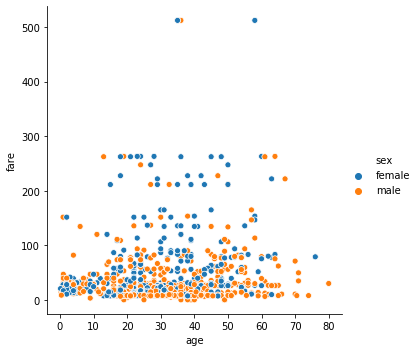

In [75]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
import seaborn as sns
import pandas as pd
sns.relplot(x = 'age',y = 'fare',data = titanic,hue = 'sex')